# Grating Coupler: A Tidy3D Simulation Setup

> In this notebook, we will set up a baseline simulation for a dual-layer grating coupler. This device is designed to efficiently couple light from an optical fiber to a photonic integrated circuit. We will define the geometry, materials, and all the necessary components for a Tidy3D simulation. This initial setup will serve as the starting point for our optimization in the subsequent notebooks.

## Initial Grating Design

We start by selecting a symmetric set of widths and gaps for both the silicon and silicon nitride layers. These values satisfy the minimum feature rules and provide a sensible baseline that couples light into the waveguide.

## Defining Our Initial Guess: A Uniform Grating

Before we can optimize, we need a starting point. A common first approach is to create a periodic, uniform grating where every tooth and gap is identical. We choose a 50% duty cycle and set the period based on effective index estimates around the 1.55 µm band. This baseline is physically reasonable but, as we will see, will be very far from optimal.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tidy3d as td
from setup import get_mode_monitor_power, make_simulation, num_elements
from tidy3d import web

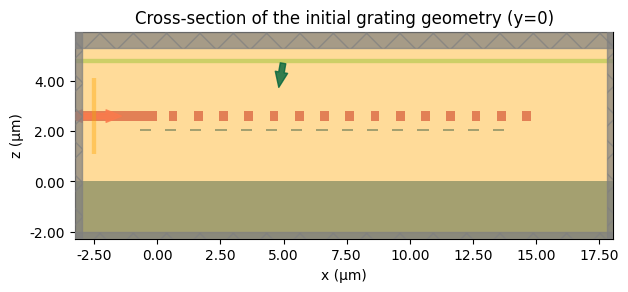

In [2]:
initial_width_si = 0.45
initial_gap_si = 0.55
initial_width_sin = 0.35
initial_gap_sin = 0.65

widths_si = np.full(num_elements, initial_width_si)
gaps_si = np.full(num_elements, initial_gap_si)
widths_sin = np.full(num_elements, initial_width_sin)
gaps_sin = np.full(num_elements, initial_gap_sin)
sim = make_simulation(
    widths_si,
    gaps_si,
    widths_sin,
    gaps_sin,
    include_field_monitor=True,
)

ax = sim.plot(y=0)
ax.set_title("Cross-section of the initial grating geometry (y=0)")
plt.show()

## Running the Simulation

We'll use `web.run` to submit the job to Tidy3D, and get some initial results.

In [3]:
sim_data = web.run(sim, task_name="gc_setup")

13:19:25 CEST Created task 'gc_setup' with task_id                              
              'fdve-eab86622-9b02-4925-970d-bf57348b3ca4' and task_type 'FDTD'.

              View task using web UI at                                         
              ]8;id=861366;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eab86622-9b02-4925-970d-bf57348b3ca4\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=363908;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eab86622-9b02-4925-970d-bf57348b3ca4\taskId]8;;\]8;id=861366;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eab86622-9b02-4925-970d-bf57348b3ca4\=]8;;\]8;id=293143;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eab86622-9b02-4925-970d-bf57348b3ca4\fdve]8;;\]8;id=861366;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eab86622-9b02-4925-970d-bf57348b3ca4\-eab86622-9b]8;;\
              ]8;id=861366;https://tidy3d.simulation.cloud/workbench?taskId=fdve-eab86622-9b02-4925-970d-bf57348b3ca4\02-4925-970d-bf57348b3ca4']8;;\.

              Task folder: ]8;id=935049;https://tidy3d.simulation.cloud/folders/folder-7a0ee478-ee62-43e0-9a9e-26a06b299b0a\'default']8;;\.

Output()

13:19:29 CEST Maximum FlexCredit cost: 0.025. Minimum cost depends on task      
              execution details. Use 'web.real_cost(task_id)' to get the billed 
              FlexCredit cost after a simulation run.

13:19:30 CEST status = success

Output()

13:19:32 CEST loading simulation from simulation_data.hdf5

## Visualizing the Results

With the simulation complete, we analyze the mode monitor spectrum and inspect the field distribution to understand how light couples into the device.

In [4]:
power_da = get_mode_monitor_power(sim_data)
freqs = power_da.coords["f"].values
wavelengths = td.C_0 / freqs
power = np.squeeze(power_da.data)
power_db = 10 * np.log10(power)

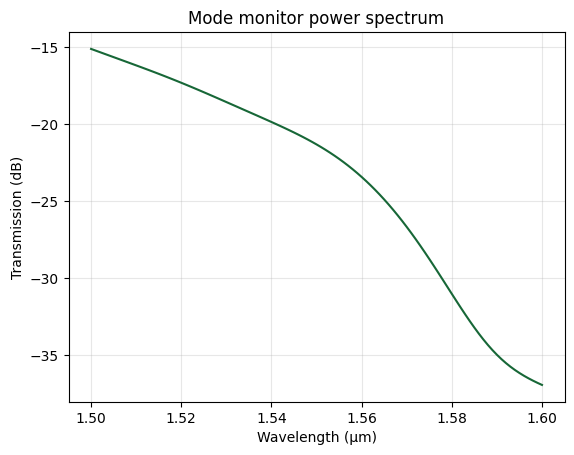

In [5]:
fig, ax = plt.subplots()
ax.plot(wavelengths, power_db)
ax.set_xlabel("Wavelength (µm)")
ax.set_ylabel("Transmission (dB)")
ax.set_title("Mode monitor power spectrum")
plt.grid(True, alpha=0.3)
plt.show()

## Baseline Performance: The Need for Optimization

The transmission spectrum shows large coupling loss (below -30 dB) near 1.55 µm, confirming that our initial guess is insufficient. We therefore turn to optimization to explore the broader design space efficiently.

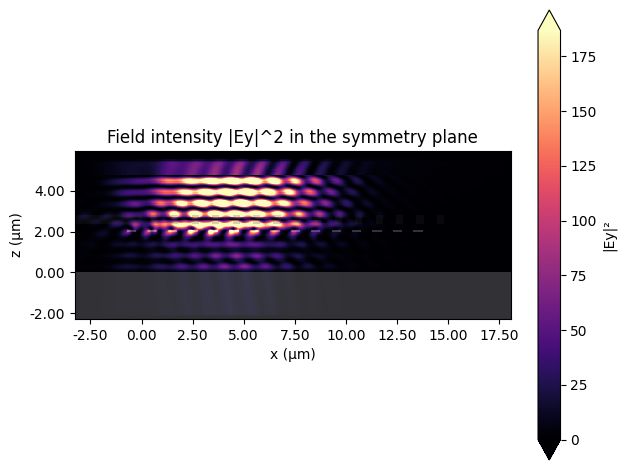

In [6]:
ax = sim_data.plot_field("field_monitor", "Ey", "abs^2")
ax.set_title("Field intensity |Ey|^2 in the symmetry plane")
plt.show()